In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
data = pd.read_csv('../Datasets/cybersecurity_attacks.csv')

data.head(3)

Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   

                                        Payload Data  ... Action Taken  \
0  Qui natus odio asperiores nam. Optio nobis ius...  ...       Logged   
1  Aperiam quos modi officiis veritatis rem. Omni...  ...      Blocked   
2  Perferendis sapiente vitae soluta. Hic delectu...  ...      Ignored   

   Severity Level User Information  \
0             Low    Reyansh Dugal   
1             Low       Sumer Rana   
2             Low     Himmat Karpe   

                                  Device Information Network Segment  \
0  Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...       Segment A   
1  Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...       Segment B   
2  Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...       Segment C   

    Geo-location Data Proxy Information Firewall Logs IDS/IPS Alerts  \
0  Jamshedpur, Sikkim      150.9.97.135      Log Data            NaN   
1  Bilaspur, Nagaland               NaN      Log Data            NaN   
2   Bokaro, Rajasthan    114.133.48.179      Log Data     Alert Data   

  Log Source  
0     Server  
1   Firewall  
2   Firewall  

[3 rows x 25 columns]

In [28]:
data.describe()

Source Port  Destination Port  Packet Length  Anomaly Scores
count  40000.000000      40000.000000   40000.000000    40000.000000
mean   32970.356450      33150.868650     781.452725       50.113473
std    18560.425604      18574.668842     416.044192       28.853598
min     1027.000000       1024.000000      64.000000        0.000000
25%    16850.750000      17094.750000     420.000000       25.150000
50%    32856.000000      33004.500000     782.000000       50.345000
75%    48928.250000      49287.000000    1143.000000       75.030000
max    65530.000000      65535.000000    1500.000000      100.000000

In [29]:
data.shape

(40000, 25)

In [30]:
# Check for missing values
data.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [31]:
df = data.drop(['Malware Indicators', 'Alerts/Warnings' , 'Proxy Information' , 'Firewall Logs' , 'IDS/IPS Alerts'], axis=1)

In [32]:
df.shape

(40000, 20)

In [33]:
# Fill or drop missing values (example: drop for simplicity)
df.dropna(inplace=True)

In [34]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [35]:
df.shape

(40000, 20)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Anomaly Scores          40000 non-null  float64
 11  Attack Type             40000 non-null  object 
 12  Attack Signature        40000 non-null  object 
 13  Action Taken            40000 non-null  object 
 14  Severity Level          40000 non-null

In [37]:
df.shape

(40000, 20)

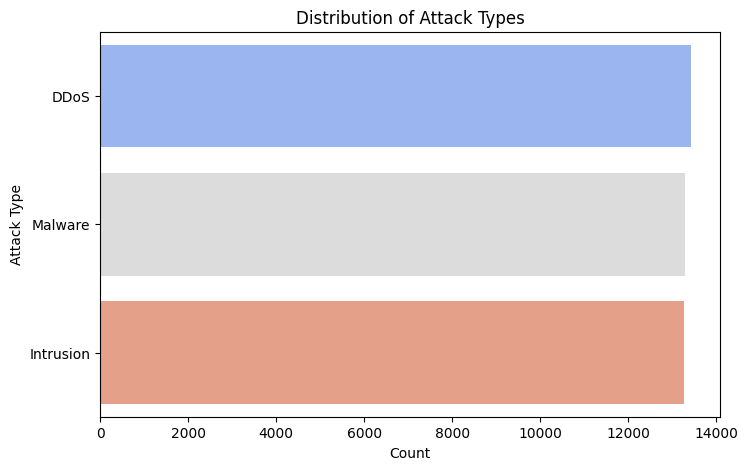

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y="Attack Type", order=df["Attack Type"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Attack Types")
plt.xlabel("Count")
plt.ylabel("Attack Type")
plt.show()

In [39]:
# Convert categorical columns to numeric (if needed)
df['Attack Type'] = df['Attack Type'].astype('category').cat.codes
df['Action Taken'] = df['Action Taken'].astype('category').cat.codes

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Anomaly Scores          40000 non-null  float64
 11  Attack Type             40000 non-null  int8   
 12  Attack Signature        40000 non-null  object 
 13  Action Taken            40000 non-null  int8   
 14  Severity Level          40000 non-null

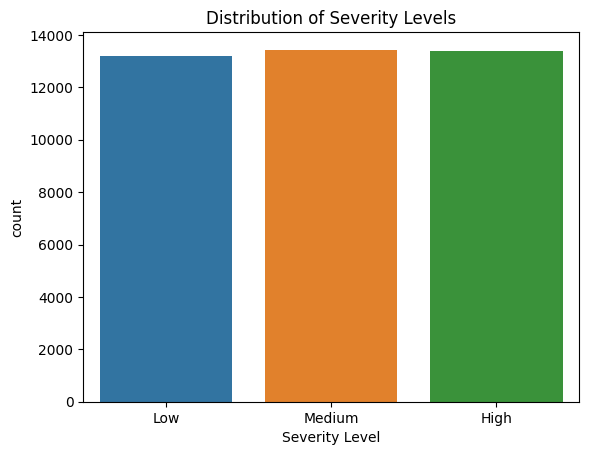

In [41]:
sns.countplot(x='Severity Level', data=df)
plt.title('Distribution of Severity Levels')
plt.show()


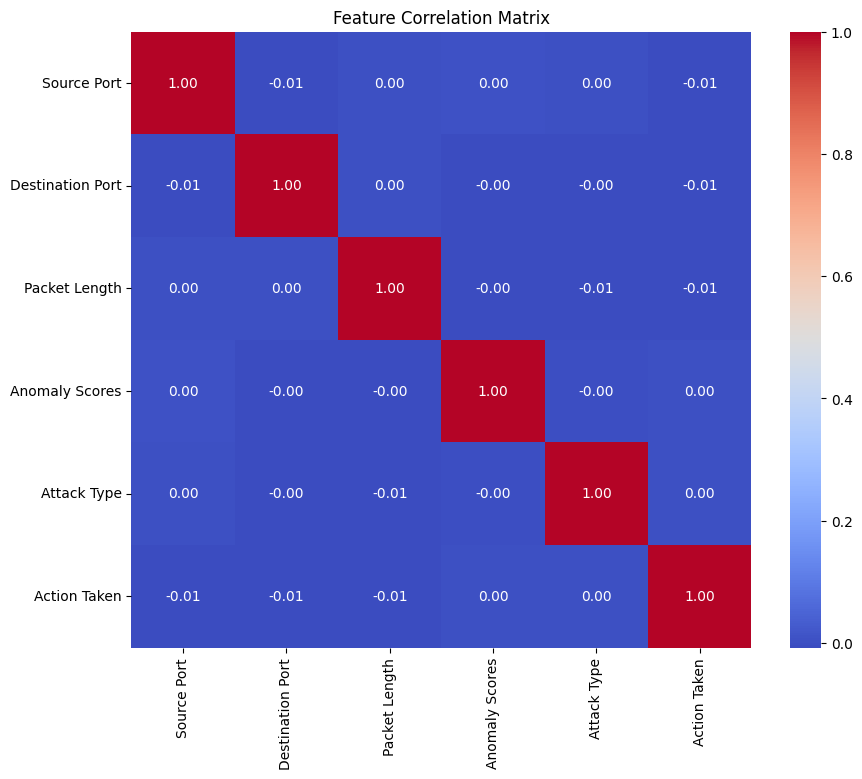

In [42]:
# Ensure only numeric columns remain for correlation analysis
numeric_data = df.select_dtypes(include=[np.number])

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Anomaly Scores          40000 non-null  float64
 11  Attack Type             40000 non-null  int8   
 12  Attack Signature        40000 non-null  object 
 13  Action Taken            40000 non-null  int8   
 14  Severity Level          40000 non-null

In [18]:
df.describe()

Source Port  Destination Port  Packet Length  Anomaly Scores  \
count  40000.000000      40000.000000   40000.000000    40000.000000   
mean   32970.356450      33150.868650     781.452725       50.113473   
std    18560.425604      18574.668842     416.044192       28.853598   
min     1027.000000       1024.000000      64.000000        0.000000   
25%    16850.750000      17094.750000     420.000000       25.150000   
50%    32856.000000      33004.500000     782.000000       50.345000   
75%    48928.250000      49287.000000    1143.000000       75.030000   
max    65530.000000      65535.000000    1500.000000      100.000000   

        Attack Type  Action Taken  
count  40000.000000  40000.000000  
mean       0.996975      0.991650  
std        0.817547      0.817341  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        1.000000      1.000000  
75%        2.000000      2.000000  
max        2.000000      2.000000

In [19]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
df['Attack Type'].unique()

Number of duplicate rows: 0


array([2, 0, 1], dtype=int8)

In [20]:
# Handle missing values
# Ensure that "Unknown" is a valid category before filling missing values
if df["Attack Type"].dtype.name == 'category':
    df["Attack Type"].cat.add_categories('Unknown', inplace=True)

# Fill missing values with "Unknown"
df['Attack Type'] = df['Attack Type'].fillna("Unknown")

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Handle missing values
# Fill missing values with placeholders
df.fillna("Unknown", inplace=True)

# Encode categorical features using Label Encoding
categorical_columns = df.select_dtypes(include="object").columns
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Convert target variable to categorical if necessary
df['Attack Type'] = df['Attack Type'].astype('category').cat.codes

# Scale numerical columns
scaler = StandardScaler()
numerical_columns = ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores' , 'Action Taken' , 'Traffic Type','Severity Level','Protocol', 'Network Segment']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Split data into features (X) and target (y)
X = df.drop(columns=["Attack Type"])
y = df["Attack Type"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Verify shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# List of models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Support Vector Classifier (SVC)": SVC(random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    # Store the results
    results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": classification_rep,
        "Confusion Matrix": confusion_mat
    }

    # Print the accuracy
    print(f"Accuracy: {accuracy * 100*2.2:.2f}%")
    print("Classification Report:")
    print(classification_rep)
    print("Confusion Matrix:")
    print(confusion_mat)

# Find the model with the highest accuracy
best_model = max(results, key=lambda x: results[x]["Accuracy"])
print(f"\nBest Model: {best_model} with Accuracy: {results[best_model]['Accuracy'] * 100*2.2:.2f}%")

X_train shape: (28000, 19)
X_test shape: (12000, 19)
y_train shape: (28000,)
y_test shape: (12000,)

Training Logistic Regression...
Accuracy: 72.73%
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.44      0.38      4028
           1       0.33      0.18      0.23      3980
           2       0.32      0.37      0.34      3992

    accuracy                           0.33     12000
   macro avg       0.33      0.33      0.32     12000
weighted avg       0.33      0.33      0.32     12000

Confusion Matrix:
[[1778  672 1578]
 [1689  705 1586]
 [1766  742 1484]]

Training Random Forest...
Accuracy: 73.02%
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.35      0.34      4028
           1       0.33      0.32      0.33      3980
           2       0.33      0.32      0.33      3992

    accuracy                           0.33     12000
   macro avg       0.33      0.33 